# Multiple Linear Regression Model on Forest Fires Dataset to Predict Fire Weather Index

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Feature Engineering

Select FWI (fire weather index) as the dependent feature and the rest except classes as the independent features. 

In [2]:
# Change path as needed
df=pd.read_csv('~/Desktop/Data Science/GitHub/Machine-Learning-Projects-End-to-End/Algerian-Forest-Fire-Predictor/dataset/Algerian_forest_fires_cleaned_dataset.csv')
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [3]:
# Import the train and test indices 
# Change path as needed
train_idx = pd.read_csv('~/Desktop/Data Science/GitHub/Machine-Learning-Projects-End-to-End/Algerian-Forest-Fire-Predictor/dataset/train_idx.csv')['train_idx'].values
test_idx = pd.read_csv('~/Desktop/Data Science/GitHub/Machine-Learning-Projects-End-to-End/Algerian-Forest-Fire-Predictor/dataset/test_idx.csv')['test_idx'].values

In [4]:
# Separate into X and y features
X = df.drop(columns=['FWI', 'Classes'])
y = df['FWI']

In [5]:
# Split the data into training and testing splits
X_train = X.iloc[train_idx]
X_test = X.iloc[test_idx]
y_train = y.iloc[train_idx]
y_test = y.iloc[test_idx]

# Check the splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (182, 10)
X_test shape: (61, 10)
y_train shape: (182,)
y_test shape: (61,)


## Checking for Multicollinearity


- We are checking if two features are highly correlated and can be reduced by removing one of the features. This is because when two features are highly correlated, they bring similar information to the model thus are redundant. 
    - This is the essence of checking for multicollinearity which occurs when two or more independent variables in a regression model are strongly related, meaning a change in one variable is associated with a predictable change in another. 
    - This correlation makes it difficult to isolate the individual effect of each predictor variable on the outcome. The model might struggle to determine which variable is truly contributing to the change in the dependent variable. 


- The threshold for determining how correlated they must be before dropping one of the features is usually determined by the domain expert. 

- To address multicollinearity:
    - Remove or combine variables
    - Use regularization techniques such as ridge regression or LASSO
    - Use PCA


<Axes: >

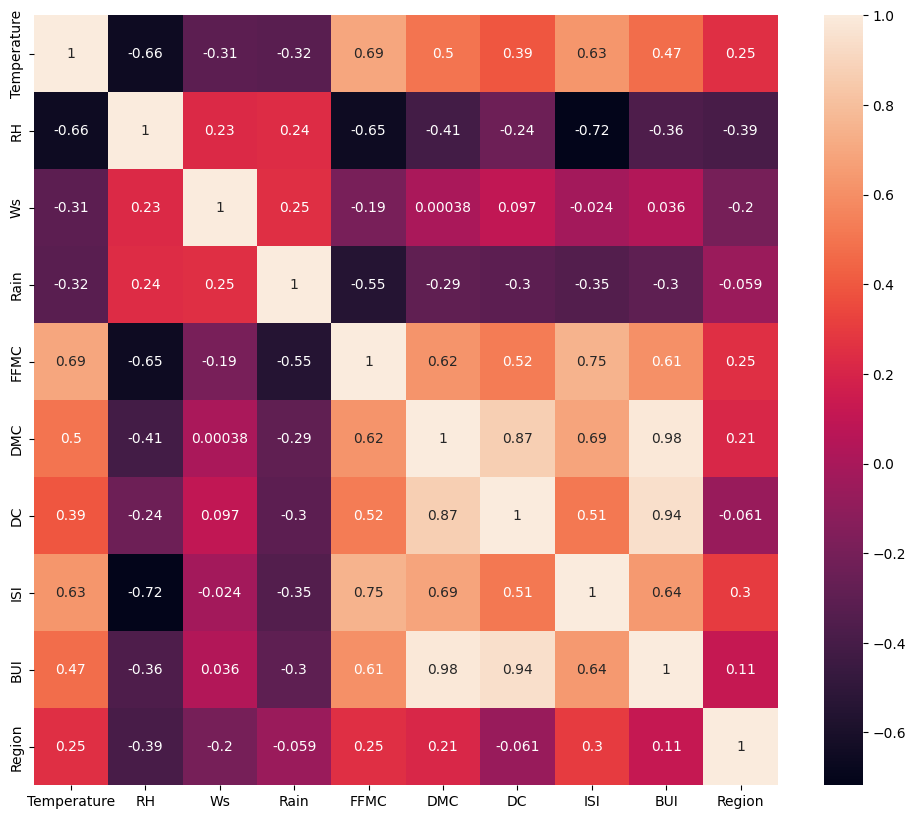

In [6]:
## Check for multicollinearity
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [7]:
# Define a function to detect correlated variables based on a threshold (threshold determined based on domain expertise)
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [8]:
# Determine correlated features - we are using 0.85 as a threshold but that can be changed based on domain expertise
corr_features=correlation(X_train,0.85)
corr_features

{'BUI', 'DC'}

In [9]:
# Drop features when correlation is more than 0.85 
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

/var/folders/3v/wc4cv1c5015_bssv4wn_bwkc0000gn/T/ipykernel_5477/876760416.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.drop(corr_features,axis=1,inplace=True)
/var/folders/3v/wc4cv1c5015_bssv4wn_bwkc0000gn/T/ipykernel_5477/876760416.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.drop(corr_features,axis=1,inplace=True)


((182, 8), (61, 8))

## Feature Scaling Or Standardization

- This is to scale the values of the feature such that the different scales for each feature doesn't affect the prediction

In [10]:
from sklearn.preprocessing import StandardScaler

# Fit the scaler using training data and transform both the training and test data using the scaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

### Box plots to understand effect of standard scaler

Text(0.5, 1.0, 'X_Train After Scaling')

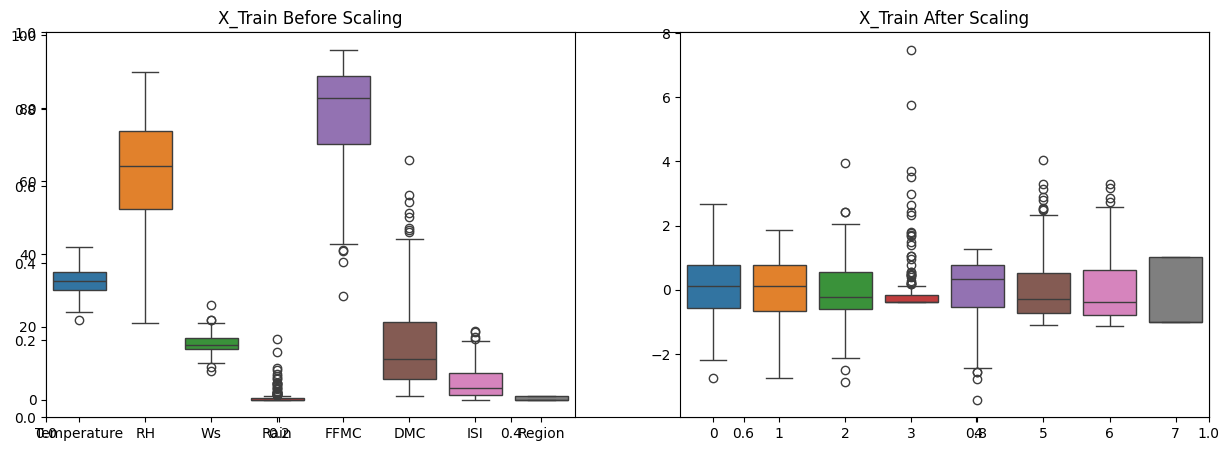

In [11]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_Train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_Train After Scaling')

# Modeling

## Linear Regression

Mean absolute error 0.5806361642310052
R2 Score 0.9830321384727897


Text(0.5, 1.0, 'Predicted vs Actual on Test Data')

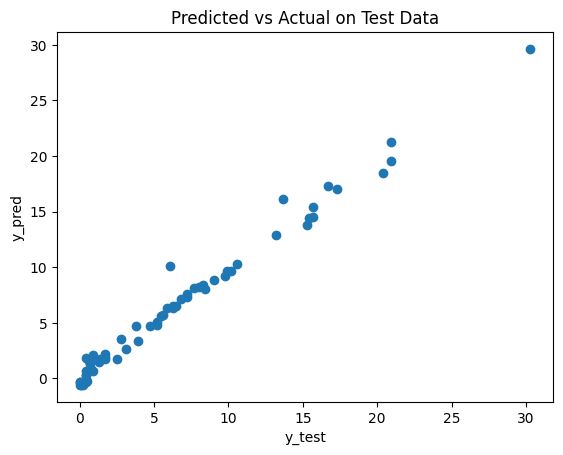

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# Fit the linear regression model with scaled training data
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)

# Predict y from scaled test data
y_pred=linreg.predict(X_test_scaled)

# Calculate MAE and R^2
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('Predicted vs Actual on Test Data')

## Analysis of Linear Regression

- Since the MAE is only 0.55, it means that the model's predictions are off by about 0.55 units from the actual values which indicates very good predictive accuracy. 
- With an R^2 of 0.9848, it means that 98.48% of the variance in the target variable is explained by the model.

## Lasso Regression

- Adds a penalty equal to the absolute value of the coefficients
    - Can shrink some coefficients exactly to zero → performs feature selection
    - The alpha value controls how strong the penalty is 

- Best when:
    - You suspect only a few features are truly important
    - You want a sparse model (fewer predictors)

Mean absolute error 0.9065345209626889
R2 Score 0.9659966557265216


Text(0.5, 1.0, 'Predicted vs Actual on Test Data')

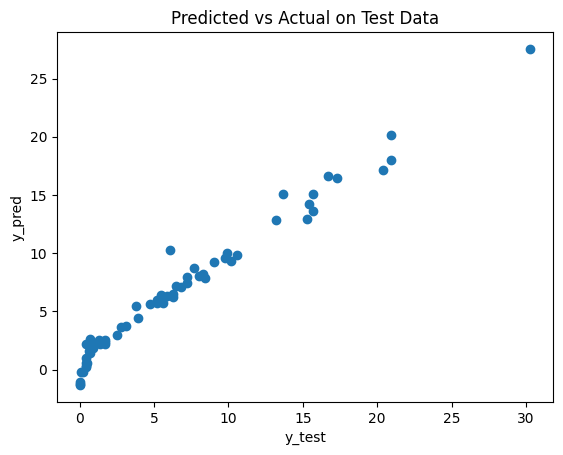

In [13]:
from sklearn.linear_model import Lasso

# Fit the lasso model
lasso=Lasso(alpha=0.5)
lasso.fit(X_train_scaled,y_train)

# Predict y from testing data
y_pred=lasso.predict(X_test_scaled)

# Analyze the predictions
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('Predicted vs Actual on Test Data')

### Analysis of Lasso Regression

- MAE 0.91, indicates that the model's predictions are off by about 0.91 units from the actual values 
- R^2 of 0.97 means that 97% of the variance in the target variable is explained by the model

#### Comparision to Linear Regression

- The model performance decreased because we had already done an initial round of feature selection, but by applying Lasso on top of it, it might've removed additional important features

## Cross Validation (CV) - Hyperparameter Tuning

- In CV, we further split the training data into train and validation and choose the number of times we want to do CV. 
- For each iteration of CV, the algorithm will choose a different subset of the training data for validation and training (ie. the data used for validation is changing for each iteration)
- Since the split of the data is chaning for each iteration, each will produce a different accuracy and the average of all the accuracies will be the accuracy of the model from CV

- When choosing the number of times to do CV, keep in mind that the more you do it, the more computationally expensive it is.
- The general guideline is :
    - Small datasets (< 500 rows): cv=5 or cv=10 is usually perfect.
    - Larger datasets (> 1000 rows): You can go cv=10–20 if computation time is acceptable.
    - Tiny datasets (< 100 rows): Consider cv=n (Leave-One-Out), but only if you really need precision.

### Lasso Cross-Validation

- In Lasso CV, we can also provide a list of alphas to test 
    - Remember that alpha controls how aggressively the model penalizes large coefficients:
        - Higher α → more shrinkage (can zero out more features)
        - Lower α → less shrinkage (acts more like regular linear regression)

Example uses:
    
    - This tests alpha of 0.1, 1.0 and 10.0
    
    model = LassoCV(alphas=[0.1, 1.0, 10.0], cv=5)
    
    or

    - This tests 100 values of alpha between 10^-4 and 10^4
    
    import numpy as np
    alphas = np.logspace(-4, 4, 100)
    model = LassoCV(alphas=alphas, cv=5)



In [14]:
from sklearn.linear_model import LassoCV

# Set the CV iterations and alphas, and fit the lasso CV models
alphas = np.logspace(-4, 4, 100)
lassocv=LassoCV(alphas=alphas, cv=5)
lassocv.fit(X_train_scaled,y_train)

LassoCV(alphas=array([1.00000000e-04, 1.20450354e-04, 1.45082878e-04, 1.74752840e-04,
       2.10490414e-04, 2.53536449e-04, 3.05385551e-04, 3.67837977e-04,
       4.43062146e-04, 5.33669923e-04, 6.42807312e-04, 7.74263683e-04,
       9.32603347e-04, 1.12332403e-03, 1.35304777e-03, 1.62975083e-03,
       1.96304065e-03, 2.36448941e-03, 2.84803587e-03, 3.43046929e-03,
       4.13201240e-03, 4.97702356e-0...
       1.38488637e+02, 1.66810054e+02, 2.00923300e+02, 2.42012826e+02,
       2.91505306e+02, 3.51119173e+02, 4.22924287e+02, 5.09413801e+02,
       6.13590727e+02, 7.39072203e+02, 8.90215085e+02, 1.07226722e+03,
       1.29154967e+03, 1.55567614e+03, 1.87381742e+03, 2.25701972e+03,
       2.71858824e+03, 3.27454916e+03, 3.94420606e+03, 4.75081016e+03,
       5.72236766e+03, 6.89261210e+03, 8.30217568e+03, 1.00000000e+04]),
        cv=5)

Mean absolute error 0.6383944250436773
R2 Score 0.9810628244622794
Best alpha: 0.055908101825122285


Text(0.5, 1.0, 'Predicted vs Actual on Test Data')

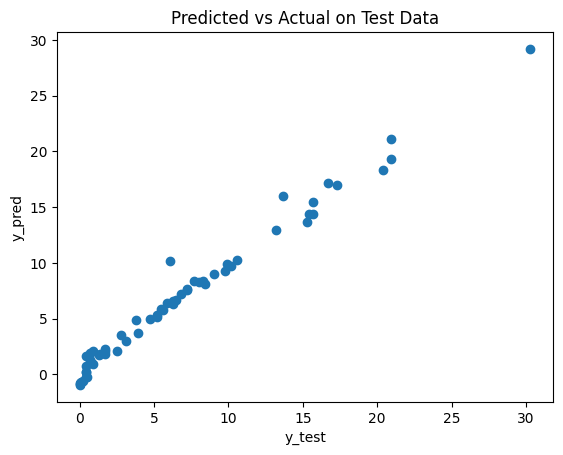

In [15]:
# Predict y from testing data
y_pred=lassocv.predict(X_test_scaled)

# Analyze the predictions
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
print("Best alpha:", lassocv.alpha_)

plt.scatter(y_test,y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('Predicted vs Actual on Test Data')

### Analysis of Lasso CV

- The R^2 of the Lasso CV model increased, getting closer to the R^2 of the Linear Regression model
- The MAE is still slightly lower than the Linear Regression 

## Ridge Regression Model
 - In Ridge Regression, it adds a penalty equal to the square of the coefficients' magnitudes to the loss function
 - It encourages smaller coefficients, but never drives them to zero meaning it keeps all features but reduces their influence 

 - Best when:
    - There are many small/medium-sized correlated features
    - You want to keep all predictors but shrink their impact

Mean absolute error 0.5969613029130065
R2 Score 0.9824907652592586


Text(0.5, 1.0, 'Predicted vs Actual on Test Data')

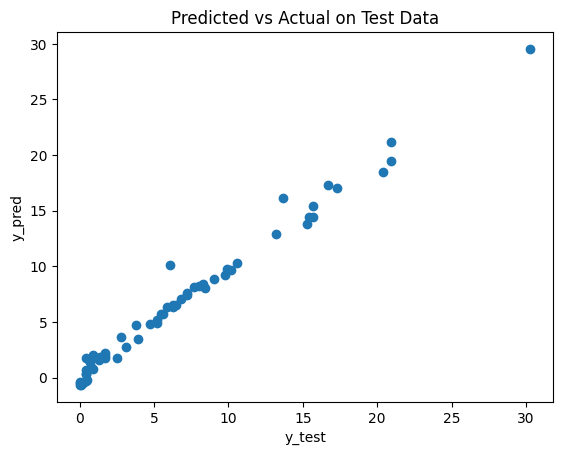

In [16]:
from sklearn.linear_model import Ridge

ridge=Ridge()
ridge.fit(X_train_scaled,y_train)

y_pred=ridge.predict(X_test_scaled)

mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('Predicted vs Actual on Test Data')

## Ridge CV
- Similar to Lasso, the alpha controls the penalty term, except we only shrink all the coefficients but none of them go to zero 

Mean absolute error 0.6687611771391766
R2 Score 0.9796869154993127
Best alpha: 4.862601580065354


Text(0.5, 1.0, 'Predicted vs Actual on Test Data')

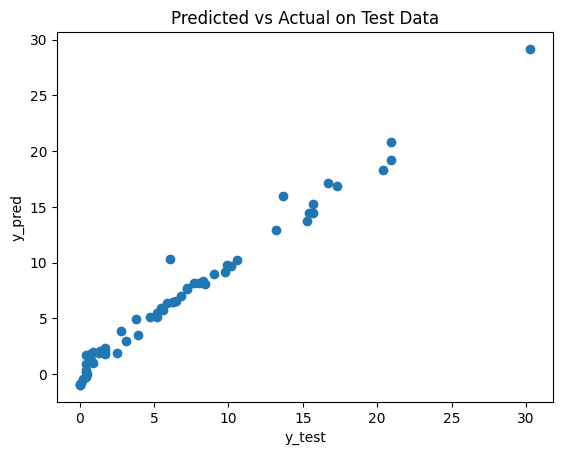

In [17]:
from sklearn.linear_model import RidgeCV

alphas = np.logspace(-4, 4, 100)
ridgecv=RidgeCV(alphas=alphas, cv=5)
ridgecv.fit(X_train_scaled,y_train)

y_pred=ridgecv.predict(X_test_scaled)

mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
print("Best alpha:", ridgecv.alpha_)
plt.scatter(y_test,y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('Predicted vs Actual on Test Data')

## Elasticnet Regression

- Linear regression with combined L1 and L2 priors as regularizer

- α: overall regularization strength (like in Lasso and Ridge)
- ρ (or l1_ratio in code): mix between L1 and L2
    - ρ=1 → pure Lasso
    - ρ=0 → pure Ridge
    - ρ=0.5 → equal mix of L1 and L2

Mean absolute error 1.928441451179673
R2 Score 0.868664603256521


Text(0.5, 1.0, 'Predicted vs Actual on Test Data')

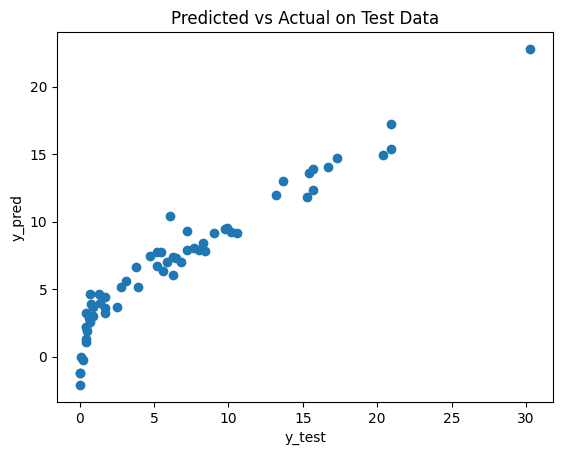

In [18]:
from sklearn.linear_model import ElasticNet

elastic=ElasticNet()
elastic.fit(X_train_scaled,y_train)

y_pred=elastic.predict(X_test_scaled)

mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('Predicted vs Actual on Test Data')

## Elasticnet CV

/Users/saadabdullah/opt/anaconda3/envs/ds_new/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:681: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/saadabdullah/opt/anaconda3/envs/ds_new/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4349.346963609762, tolerance: 0.8701337655172416
  model = cd_fast.enet_coordinate_descent_gram(
/Users/saadabdullah/opt/anaconda3/envs/ds_new/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:681: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/saadabdullah/

Mean absolute error 0.6798704517280098
R2 Score 0.9792943131044299
Best alpha: 0.04641588833612782
Best l1_ratio: 0.5


Text(0.5, 1.0, 'Predicted vs Actual on Test Data')

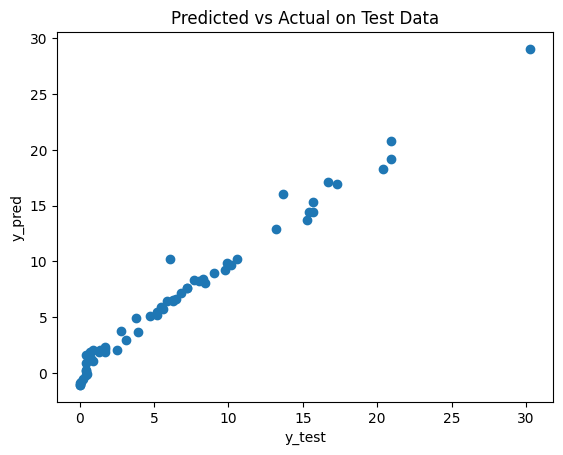

In [19]:
from sklearn.linear_model import ElasticNetCV

elasticcv=ElasticNetCV(l1_ratio=[0, 0.1, 0.5,0.9 ], alphas=np.logspace(-4, 4, 100), cv=5)
elasticcv.fit(X_train_scaled,y_train)

y_pred=elasticcv.predict(X_test_scaled)

mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
print("Best alpha:", elasticcv.alpha_)
print("Best l1_ratio:", elasticcv.l1_ratio_)

plt.scatter(y_test,y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('Predicted vs Actual on Test Data')

# Model Selection and Saving Models for Deployment

- According to the R^2 and MAE values, the normal Linear Regression model performed the best so that along with the scaler will be saved using pickle

In [20]:
scaler

StandardScaler()

In [21]:
linreg

LinearRegression()

In [22]:
# Pickle the ML models and preprocessing model standardscaler
import pickle

pickle.dump(scaler,open('linear_regression_scaler.pkl','wb'))
pickle.dump(linreg,open('linreg.pkl','wb'))
